In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd
import util_mnist_reader1 as mnist_reader

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
train_image=train_images.reshape((60000,784))
test_image=test_images.reshape((10000,784))

In [0]:
train_images=train_images/255.0
test_images=test_images/255.0

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                       keras.layers.Dense(128,activation='relu'),
                        keras.layers.Dense(64,activation='relu'),
                       keras.layers.Dense(10,activation='softmax')])

In [0]:
model.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
model.fit(train_images, train_labels, epochs=20, batch_size=512, shuffle=True, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 1s 24us/sample - loss: 1.8151 - acc: 0.4472 - val_loss: 1.3630 - val_acc: 0.6577
Epoch 2/20
54000/54000 [==============================] - 1s 25us/sample - loss: 1.1522 - acc: 0.6708 - val_loss: 0.9802 - val_acc: 0.6950
Epoch 3/20
54000/54000 [==============================] - 1s 24us/sample - loss: 0.9102 - acc: 0.7044 - val_loss: 0.8290 - val_acc: 0.7302
Epoch 4/20
54000/54000 [==============================] - 1s 24us/sample - loss: 0.8000 - acc: 0.7349 - val_loss: 0.7502 - val_acc: 0.7527
Epoch 5/20
54000/54000 [==============================] - 1s 22us/sample - loss: 0.7339 - acc: 0.7572 - val_loss: 0.6952 - val_acc: 0.7705
Epoch 6/20
54000/54000 [==============================] - 1s 21us/sample - loss: 0.6866 - acc: 0.7731 - val_loss: 0.6572 - val_acc: 0.7820
Epoch 7/20
54000/54000 [==============================] - 1s 25us/sample - loss: 0.6496 - acc: 0.7856 - val_loss: 0.6

In [0]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print("\n Test accuracy:",test_acc)

10000/10000 [==============================] - 0s 35us/sample - loss: 0.5128 - acc: 0.8216

 Test accuracy: 0.8216


In [0]:
train_loss,train_acc=model.evaluate(train_images,train_labels)
print("\n Train accuracy:",train_acc)

60000/60000 [==============================] - 2s 32us/sample - loss: 0.4846 - acc: 0.8344

 Train accuracy: 0.8343667


In [0]:
print(model.history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


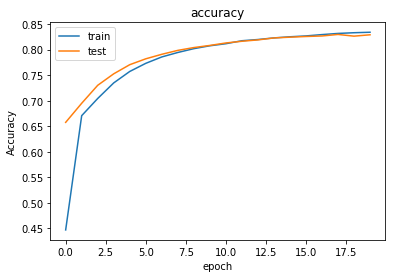

In [0]:
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title("accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc='upper left')
plt.show()

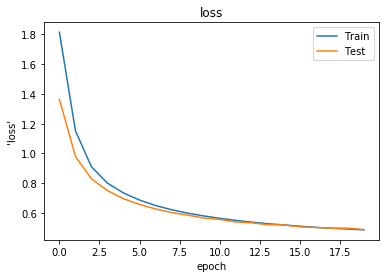

In [0]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title("loss")
plt.ylabel("'loss'")
plt.xlabel("epoch")
plt.legend(['Train','Test'],loc="upper right")
plt.show()

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
predicted_test=model.predict(test_images)

In [0]:
from sklearn.metrics import confusion_matrix
pr=[]
for i in range(len(test_images)):
    predicted_test_index=np.argmax(predicted_test[i]) 
    pr.append(predicted_test_index)
confusion=confusion_matrix(test_labels,pr)  
print(confusion)

2

In [0]:
test_labels[1]

2

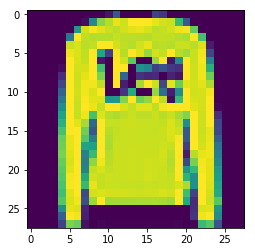

In [0]:
plt.figure()
plt.imshow(np.squeeze(test_images[1]))